In [ ]:
# https://www.python-course.eu/neural_network_mnist.php
# https://keras.io/examples/vision/mnist_convnet/
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
import random

In [ ]:
!wget https://www.python-course.eu/data/mnist/mnist_train.csv
!wget https://www.python-course.eu/data/mnist/mnist_test.csv

--2020-11-24 12:03:10--  https://www.python-course.eu/data/mnist/mnist_train.csv
Resolving www.python-course.eu (www.python-course.eu)... 138.201.17.115, 2a01:4f8:171:286f::4
Connecting to www.python-course.eu (www.python-course.eu)|138.201.17.115|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109575994 (104M) [text/csv]
Saving to: ‘mnist_train.csv.1’

mnist_train.csv.1   100%[===================>] 104.50M  26.0MB/s    in 4.4s    

2020-11-24 12:03:15 (23.6 MB/s) - ‘mnist_train.csv.1’ saved [109575994/109575994]

--2020-11-24 12:03:15--  https://www.python-course.eu/data/mnist/mnist_test.csv
Resolving www.python-course.eu (www.python-course.eu)... 138.201.17.115, 2a01:4f8:171:286f::4
Connecting to www.python-course.eu (www.python-course.eu)|138.201.17.115|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18289443 (17M) [text/csv]
Saving to: ‘mnist_test.csv.1’

mnist_test.csv.1    100%[===================>]  17.44M  13.7MB/s    in 1.3s 

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

image_size = 28 # width and length
no_of_different_labels = 10 #  i.e. 0, 1, 2, 3, ..., 9
image_pixels = image_size * image_size
data_path = ""
train_data = np.loadtxt("mnist_train.csv", delimiter=",")
test_data = np.loadtxt("mnist_test.csv", delimiter=",") 

In [ ]:
#Merge train and test data because we want to find easiest cases in whole dataset
merged_data = np.vstack([train_data,test_data])
merged_data.shape

(70000, 785)

In [ ]:
#normalize the dataset and avoid zero values.
fac = 0.99 / 255
mnist_images = np.asfarray(merged_data[:, 1:]) * fac + 0.01

In [ ]:
#prepare one hot representation
lr = np.arange(10)

for label in range(10):
    one_hot = (lr==label).astype(np.int)
    print("label: ", label, " in one-hot representation: ", one_hot)

label:  0  in one-hot representation:  [1 0 0 0 0 0 0 0 0 0]
label:  1  in one-hot representation:  [0 1 0 0 0 0 0 0 0 0]
label:  2  in one-hot representation:  [0 0 1 0 0 0 0 0 0 0]
label:  3  in one-hot representation:  [0 0 0 1 0 0 0 0 0 0]
label:  4  in one-hot representation:  [0 0 0 0 1 0 0 0 0 0]
label:  5  in one-hot representation:  [0 0 0 0 0 1 0 0 0 0]
label:  6  in one-hot representation:  [0 0 0 0 0 0 1 0 0 0]
label:  7  in one-hot representation:  [0 0 0 0 0 0 0 1 0 0]
label:  8  in one-hot representation:  [0 0 0 0 0 0 0 0 1 0]
label:  9  in one-hot representation:  [0 0 0 0 0 0 0 0 0 1]


In [ ]:
#check the labels for the first 10 cases
mnist_labels = np.asfarray(merged_data[:, :1])
mnist_labels[:10]

array([[5.],
       [0.],
       [4.],
       [1.],
       [9.],
       [2.],
       [1.],
       [3.],
       [1.],
       [4.]])

In [ ]:
# transform labels into one hot representation
mnist_labels_one_hot = (lr==mnist_labels).astype(np.float)
mnist_labels_one_hot[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

In [ ]:
#check shapes
print(mnist_images.shape)
print(mnist_labels.shape)

(70000, 784)
(70000, 1)


In [ ]:
#X_train = X_train.astype("float32") 
#X_test = X_test.astype("float32") 

In [ ]:
#prepare tensor array using reshape function
print(mnist_images.shape)
mnist_images_tensor = np.reshape(mnist_images,(mnist_images.shape[0],28,28,1))
print(mnist_images_tensor.shape)

(70000, 784)
(70000, 28, 28, 1)


Image number : 56426
Image label  : 7



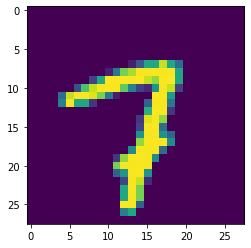

In [ ]:
#plot the random number from dataset
rand_int = random.randint(0,mnist_images_tensor.shape[0])
print("Image number : "+str(rand_int))
print("Image label  : "+str(int(mnist_labels[rand_int,0]))+"\n")
plt.imshow(mnist_images_tensor[rand_int,:,:,0])


In [ ]:
### The  model selection will results in better or worsen accuracy of numbers recognition. 
### If we want to find the easiest cases we should not choose the best working model, 
### but at most moderately good.

In [ ]:
# Model 1/ data parameters
num_classes = 10
input_shape = (28, 28, 1)

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(16, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

batch_size = 100
epochs = 5

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        9280      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

In [ ]:
# Model 2 conv8_con16 / data parameters
num_classes = 10
input_shape = (28, 28, 1)

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(8, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(16, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

batch_size = 100
epochs = 5

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 8)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 16)        1168      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)               

In [ ]:
# Model 3 conv8_con16 / data parameters
num_classes = 10
input_shape = (28, 28, 1)

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(10, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(20, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()
model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])

batch_size = 100
epochs = 5

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 10)        100       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 10)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 20)        1820      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 20)          0         
_________________________________________________________________
flatten (Flatten)            (None, 500)               0         
_________________________________________________________________
dropout (Dropout)            (None, 500)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                5

In [ ]:
### To find the easiest cases we have to train the network many times with
### every time casses randomly assigned to train and test set. 
### After training for single train/test case, the weighst of neural network must 
### be reinitialized

In [ ]:
# https://github.com/keras-team/keras/issues/341
def shuffle_weights(model, weights=None):
    """Randomly permute the weights in `model`, or the given `weights`.

    This is a fast approximation of re-initializing the weights of a model.

    Assumes weights are distributed independently of the dimensions of the weight tensors
      (i.e., the weights have the same distribution along each dimension).

    :param Model model: Modify the weights of the given model.
    :param list(ndarray) weights: The model's weights will be replaced by a random permutation of these weights.
      If `None`, permute the model's current weights.
    """
    if weights is None:
        weights = model.get_weights()
    weights = [np.random.permutation(w.flat).reshape(w.shape) for w in weights]
    # Faster, but less random: only permutes along the first dimension
    # weights = [np.random.permutation(w) for w in weights]
    model.set_weights(weights)

In [ ]:
epochs = 1
number_of_experiments = 25

score_array=np.zeros(70000)
score_array_hits_number = np.zeros(70000)

for experiment in range(0, number_of_experiments):
  print('Experiment no: '+str(experiment))
  # a - array with shuffled indexes of mnist numbers
  np.random.shuffle(a)
  #print(a)
  #array([38198, 20559, 47355, ..., 66853, 40527,  1123])
  #print(mnist_images_tensor.shape)

  #prepare train and test data
  train_reshufled = np.zeros(shape=(50000,28,28,1))
  train_reshufled_labels=np.zeros(shape=(50000,10))

  for i in range(0,50000):
    train_reshufled[i,:,:,0]=mnist_images_tensor[a[i],:,:,0]
    train_reshufled_labels[i,:]=mnist_labels_one_hot[a[i],:]

  #as test data set we take only the last 10k "rows" after shufling
  test_reshufled = np.zeros(shape=(20000,28,28,1))
  test_reshufled_labels=np.zeros(shape=(20000,10))

  for i in range(0,20000):
    test_reshufled[i,:,:,0]=mnist_images_tensor[a[i+50000],:,:,0]
    test_reshufled_labels[i,:]=mnist_labels_one_hot[a[i+50000],:]
   
  tf.keras.backend.clear_session()
  shuffle_weights(model)
  
  model.fit(train_reshufled, train_reshufled_labels, batch_size=batch_size, epochs=epochs, validation_split=0.2)

  score = model.evaluate( test_reshufled,  test_reshufled_labels, verbose=0)
  print("Test loss:", score[0])
  print("Test accuracy:", score[1])
  print(test_reshufled.shape)
  print(test_reshufled_labels.shape)

  aa=model.predict( test_reshufled, verbose=0)
  #print(aa[0,:])
  #array([1.1848800e-11, 2.5377978e-16, 7.4110206e-14, 6.2254471e-06,
  #       8.3712160e-12, 9.9999213e-01, 4.2485048e-08, 5.1089830e-15,
  #       2.9114098e-08, 1.5973959e-06], dtype=float32)

  aaa = np.argmax(aa,axis=1)
  #print(aaa[:10])
  #array([5, 4, 7, 8, 1, 1, 4, 3, 5, 1])

  #print(test_reshufled_labels[1])
  # [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
  trl = np.argmax(test_reshufled_labels,axis=1)
  #print(trl[1])
  # 4

  #aaa
  #array([5, 4, 7, ..., 7, 6, 1])
  #trl
  #array([5, 4, 7, ..., 7, 6, 1])

  bbb = np.equal(aaa, trl)

  i=0
  #print(a[i])
  for cell in bbb:
    if cell == True:
      score_array[a[50000+i]]+=aa[i,:].max()
      score_array_hits_number[a[50000+i]]+=1
    else:
      score_array_hits_number[a[50000+i]]+=1
    i+=1


print(score_array.sum())
print(score_array_hits_number[0])
print(score_array_hits_number.sum())

Experiment no: 0
400/400 [==============================] - 14s 36ms/step - loss: 1.9836 - accuracy: 0.3250 - val_loss: 1.0357 - val_accuracy: 0.8012
Test loss: 1.0419855117797852
Test accuracy: 0.7904499769210815
(20000, 28, 28, 1)
(20000, 10)
Experiment no: 1
400/400 [==============================] - 14s 36ms/step - loss: 1.7175 - accuracy: 0.4141 - val_loss: 0.7759 - val_accuracy: 0.8153
Test loss: 0.7825673222541809
Test accuracy: 0.8147000074386597
(20000, 28, 28, 1)
(20000, 10)
Experiment no: 2
400/400 [==============================] - 14s 36ms/step - loss: 1.3961 - accuracy: 0.5385 - val_loss: 0.5405 - val_accuracy: 0.8694
Test loss: 0.5358182191848755
Test accuracy: 0.8694999814033508
(20000, 28, 28, 1)
(20000, 10)
Experiment no: 3
400/400 [==============================] - 14s 36ms/step - loss: 1.5198 - accuracy: 0.4894 - val_loss: 0.6037 - val_accuracy: 0.8636
Test loss: 0.6011869311332703
Test accuracy: 0.8600500226020813
(20000, 28, 28, 1)
(20000, 10)
Experiment no: 4
400

In [ ]:
score_array_normalised = ( score_array / (score_array_hits_number + 0.001))

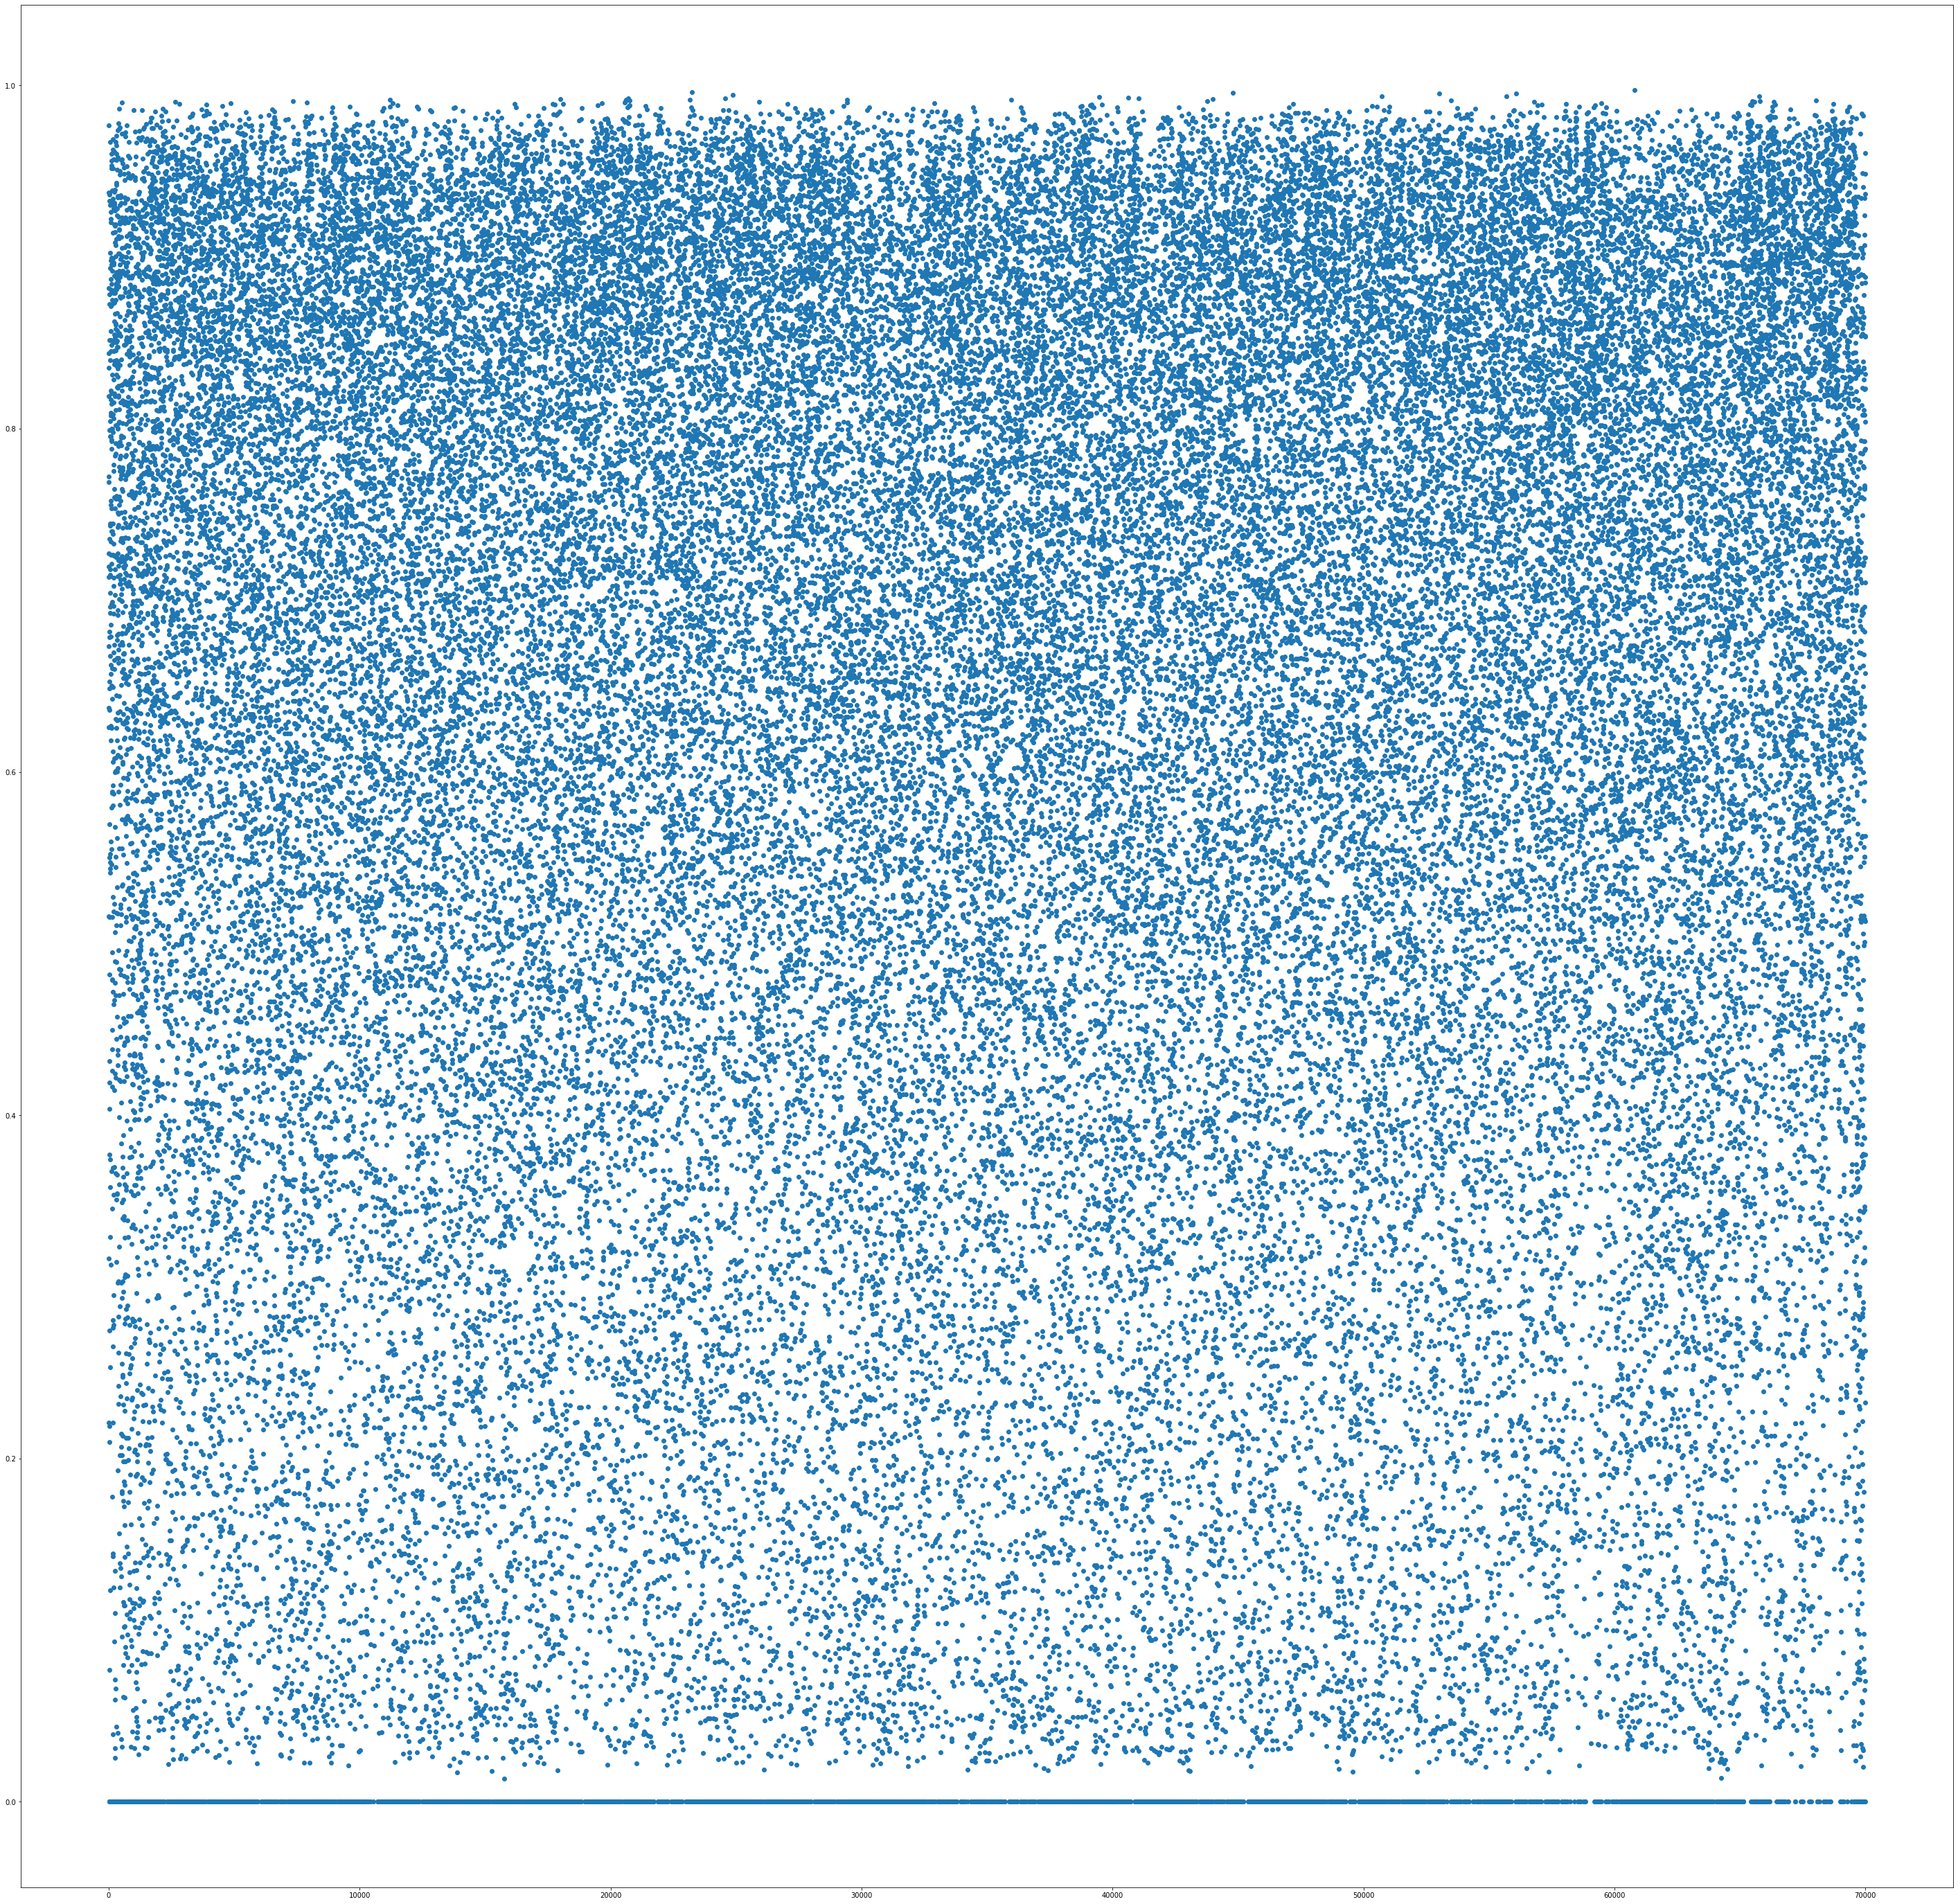

In [ ]:
# show distribution how hard or easy is to recognize number
# y axis is the accuracy
# x axis show the number index

plt.figure(figsize=(50,50))

plt.scatter(range(0,70000),score_array / (score_array_hits_number + 0.001))
#plt.hist(score_array / (score_array_hits_number + 0.001))
plt.show()

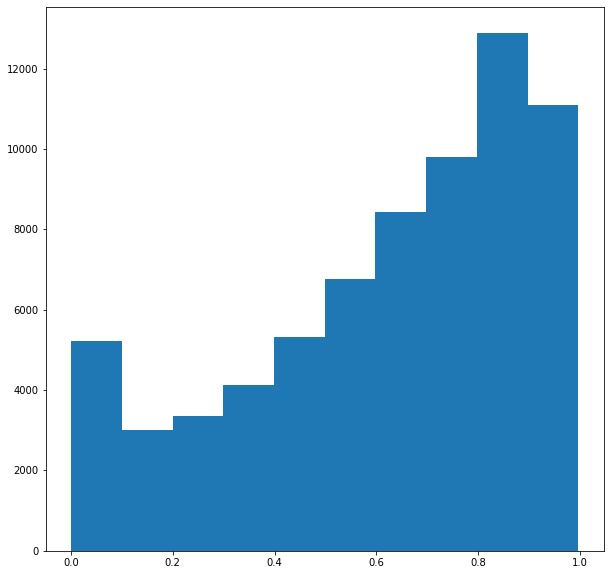

In [ ]:
# show the distribution of count of cases having a particular
# accuracy of recognition
# so we can see how many easy cases and how many hard cases are in MNIST dataset

plt.figure(figsize=(10,10))
plt.hist(score_array / (score_array_hits_number + 0.001))
plt.show()

In [ ]:
#here we can check how many cases have accuracy better than given
print("How many are number with accuracy above 70%: "+str(np.count_nonzero(score_array_normalised > 0.7))+"\n")

#wynik = mnist_labels * (score_array_normalised > 0.99)
#print((score_array_normalised > 0.95).shape)
#print(np.reshape(mnist_labels,(70000)).shape)

#print(wynik)

zzz = (score_array_normalised > 0.995) * np.reshape(mnist_labels,(70000))
print("How many there are the easiest numbers: "+str(np.count_nonzero(zzz)))

print("\nIndexes of the easiest numbers to recognize")
print(np.nonzero(zzz)[0])


How many are number with accuracy above 70%: 33599

How many there are the easiest numbers: 5

Indexes of the easiest numbers to recognize
[23229 44784 53021 56069 60799]


In [ ]:
#print(score_array_normalised > 0.90) * (np.reshape(mnist_labels,(70000)) == 0 )
mnist_reshaped= (np.reshape(mnist_labels,(70000)))

counts_needed = 500

for number in range(0,10):
  for precent in range(100,0):
    tmp_counts = np.count_nonzero((score_array_normalised > precent) * (mnist_reshaped == number))
    if tmp_counts >= counts_needed:
      print("number " + str(number) + " counts: " + str(tmp_counts) + " at precent "+str(precent))
      break

In [ ]:
score_array_normalised

array([0.22095998, 0.93748613, 0.62619728, ..., 0.51309144, 0.37709528,
       0.82349603])

In [ ]:
mnist_reshaped

array([5., 0., 4., ..., 4., 5., 6.])

In [ ]:
#SAVE arrays to file
np.save("score_array_normalised", score_array_normalised)
np.save("mnist_reshaped", mnist_reshaped)

In [ ]:
#tworzymy slownik z tablicami zawierajacymi indeksy poszczegolnych cyfr w tablicy mnist
num_indexes_arrays={}
for i in range(0,10):
  num_indexes_arrays[i]= np.argwhere(mnist_reshaped == i)

In [ ]:
num_indexes_arrays[0]

array([[    1],
       [   21],
       [   34],
       ...,
       [69964],
       [69983],
       [69993]])

In [ ]:
score_array_normalised[num_indexes_arrays[0]]

array([[0.93748613],
       [0.93282164],
       [0.07680505],
       ...,
       [0.76488314],
       [0.94838563],
       [0.71039366]])

In [ ]:
score_array_normalised_copy = score_array_normalised.copy()

#create dictionary with indexes of 500 and score of the easiest cases for all numbers 
idx_of_500_elemnts={}

for i in range(0,10):
  for j in range(0,500):
  #print(score_array_normalised[num_indexes_arrays[0]])
    #score_array_normalised[num_indexes_arrays[0]].max()
    max_idx = (np.argmax(score_array_normalised_copy[num_indexes_arrays[i]]))

    if j == 0:
      idx_of_500_elemnts[i]=np.ones(shape=(500,2),dtype=float)
    
    idx_of_500_elemnts[i][j][0]=num_indexes_arrays[i][max_idx]
    idx_of_500_elemnts[i][j][1]=score_array_normalised_copy[num_indexes_arrays[i][max_idx]]
    score_array_normalised_copy[num_indexes_arrays[i][max_idx]]=-1


In [ ]:
#some checks
##score_array_normalised_copy[num_indexes_arrays[i]][3613]
#max_idx = (np.argmax(score_array_normalised_copy[num_indexes_arrays[i]]))
#max_idx

In [ ]:
#check
idx_of_500_elemnts[0]

array([[7.89400000e+03, 9.89910589e-01],
       [4.85200000e+03, 9.89761310e-01],
       [5.94770000e+04, 9.89493204e-01],
       [1.81130000e+04, 9.89367437e-01],
       [4.72020000e+04, 9.89191406e-01],
       [2.80600000e+03, 9.89131721e-01],
       [1.77700000e+04, 9.89048726e-01],
       [3.88100000e+03, 9.88867649e-01],
       [1.94910000e+04, 9.88512749e-01],
       [4.52700000e+03, 9.87883615e-01],
       [5.10440000e+04, 9.87869552e-01],
       [6.62880000e+04, 9.87769822e-01],
       [6.93670000e+04, 9.87599806e-01],
       [1.62210000e+04, 9.87381514e-01],
       [1.73350000e+04, 9.86693711e-01],
       [5.44640000e+04, 9.86549650e-01],
       [4.29000000e+02, 9.86367687e-01],
       [3.70200000e+03, 9.85899454e-01],
       [2.79850000e+04, 9.85881869e-01],
       [1.27960000e+04, 9.85537843e-01],
       [1.41100000e+04, 9.85410379e-01],
       [6.86710000e+04, 9.85158620e-01],
       [1.85700000e+03, 9.85000985e-01],
       [6.61100000e+03, 9.84987537e-01],
       [3.639300

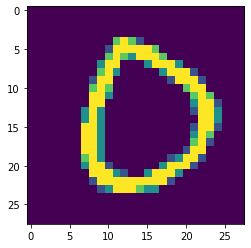

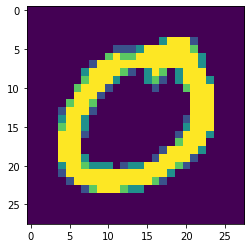

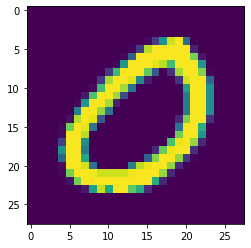

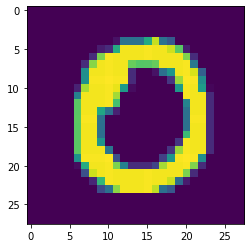

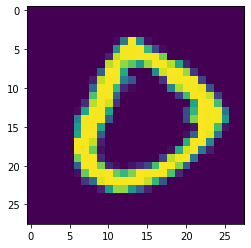

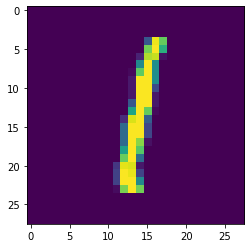

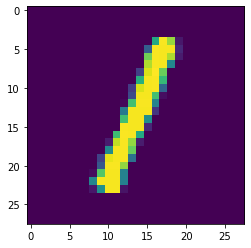

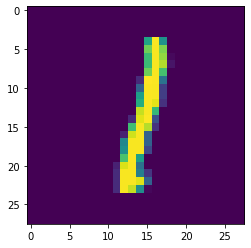

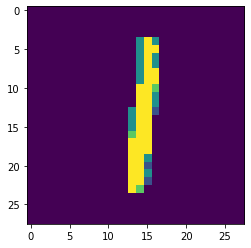

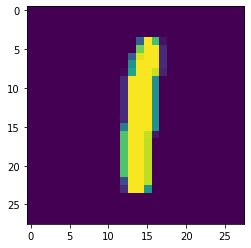

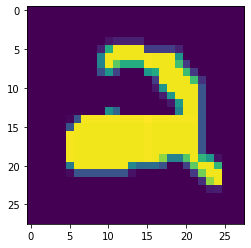

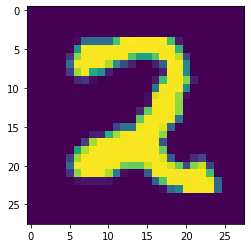

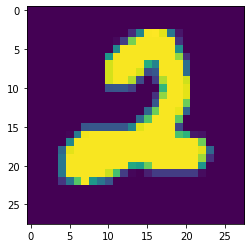

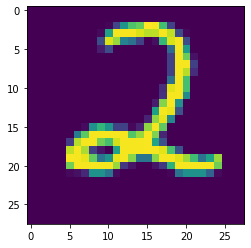

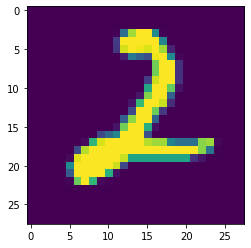

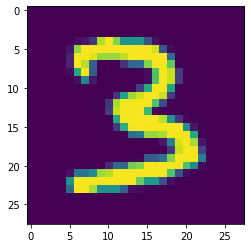

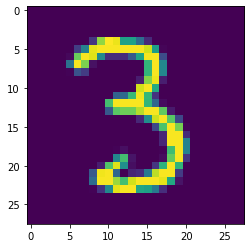

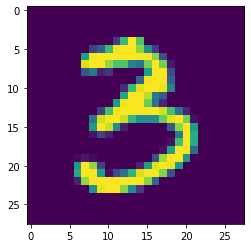

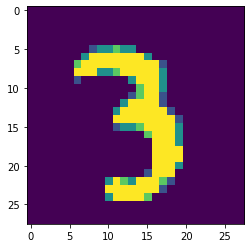

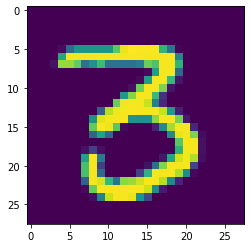

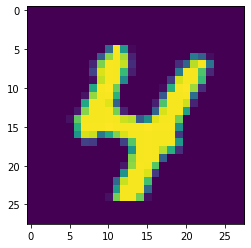

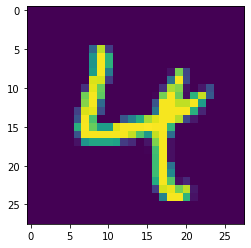

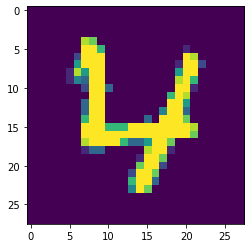

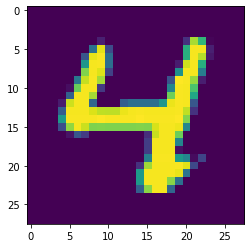

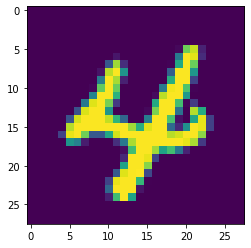

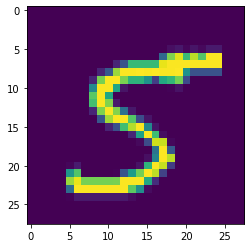

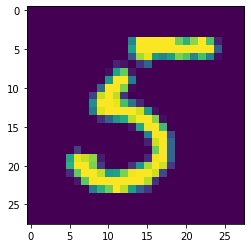

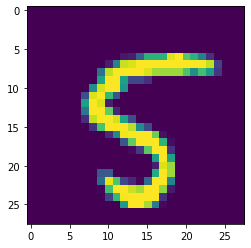

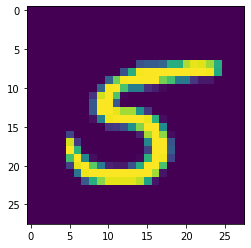

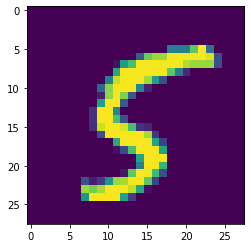

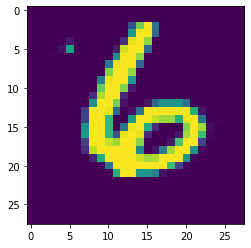

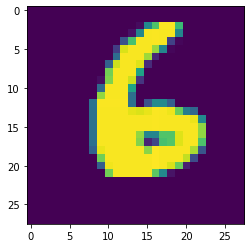

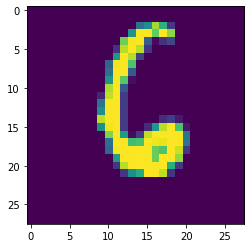

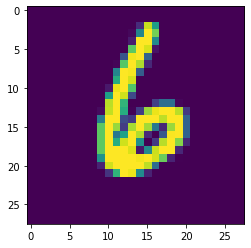

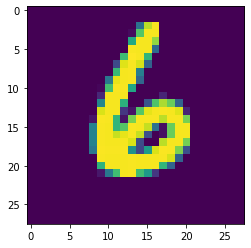

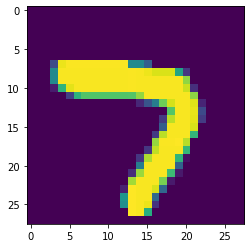

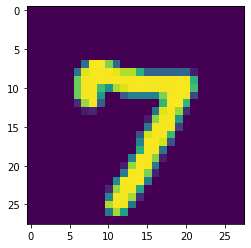

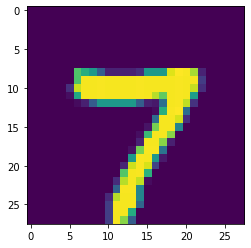

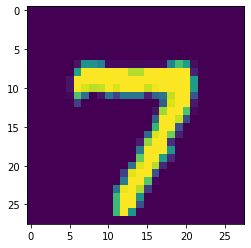

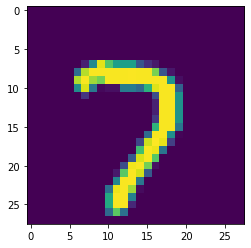

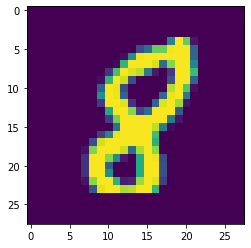

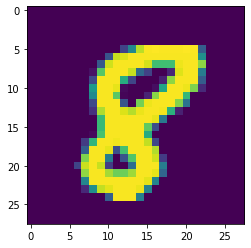

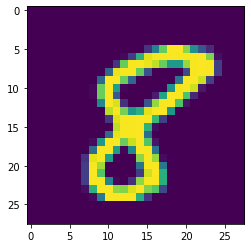

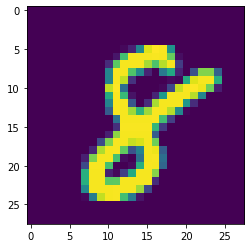

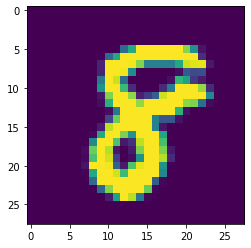

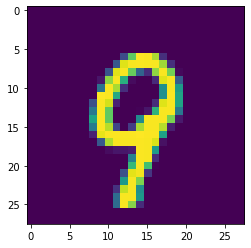

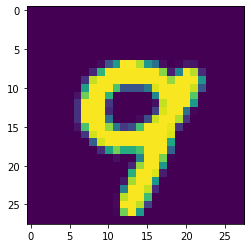

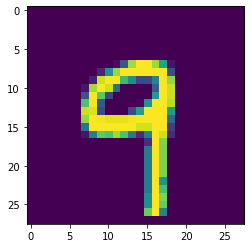

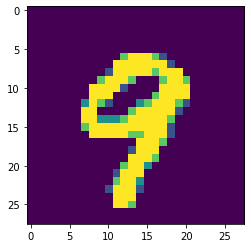

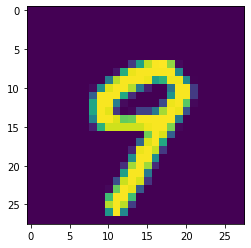

In [ ]:
#check if we have choosen correct elements
#plot 5 cases for all digits
for j in range(0,10):
  for i in range(0,5):
    temp_index = np.random.choice(idx_of_500_elemnts[j][:,0],1)
    plt.imshow(mnist_images_tensor[int(temp_index[0]),:,:,0])
    plt.show()

In [ ]:
mnist_images_tensor.shape

(70000, 28, 28, 1)

In [ ]:
#kak = np.random.choice(idx_of_500_elemnts[j][:,0],1)
#mnist_images_tensor.shape

mnist_images_tensor_selected=np.zeros((5000,28,28,1), dtype=float)
jj=0
for j in range(0,10):
  for i in range(0,500):
    mnist_images_tensor_selected[jj,0:,:,0] = mnist_images_tensor[int(idx_of_500_elemnts[j][i,0]),:,:,0]
    jj=jj+1

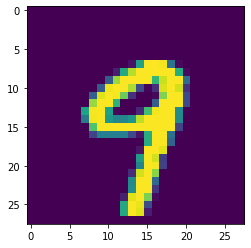

In [ ]:
#check if in given range like for example 4500:4999 there is digit 9
plt.imshow(mnist_images_tensor_selected[4997,:,:,0])

In [ ]:
#save array with 5000 easiest digits
np.save("mnist_images_tensor_selected", mnist_images_tensor_selected)